# $Final$ $Report$ $Zillow$ $Team$ $Project$

# Group 4
* Justin Evans
* Yvette Ibarra

# Project Overview:
This project has been tasked with collecting, cleaning and analyzing Zillow data from 2017 in order to improve a previous prediction model that was designed to predict the Tax Assessed Home Value for Single Family Properties based on available realestate data.

# Goals: 
* Discover key attributes that drive error in Zestimate logerror.
* Use those attributes to develop a machine learning model to predict logerror.

# Reproduction of this Data:
* Can be accomplished using a local ```env.py``` containing ```user, password, host``` information for access to the Codeup SQL database server.
* All other step by step instructions can be found by reading the below Jupyter Notebook files located in our [Codeup-Justin-Evans-Yvette-Ibarra](https://github.com/Codeup-Justin-Evans-Yvette-Ibarra/project_zillow_team.git) github repository.
    * Final_Report_Zillow_Team_Project.ipynb
    * wrangle.py

# Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# Increases Display Resolution for Graphs 
# Only works inside notebook
%matplotlib inline 

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

import wrangle as w
import model as m
import explore as e

# Acquire:

<div class="alert alert-success">

* Data acquire from Codeup Database 11/17/22
* It contained  52319 rows and 68 columns before cleaning
* Each row represents a single family household:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles' or 'Orange'or 'Ventura'
* Each column represents a feature related to the single family residential.

In [2]:
# acquire telco data 
df = w.get_zillow_data()

In [3]:
# show row and column count
df.shape

(52319, 68)

# Prepare:
<div class="alert alert-success">


prepare actions:
* After the follwing steps we retained 95.9% of original data:
    * Outliers were removed
    (to better fit the definition of Single Family Property):
    
        * Beds above 8 
        * Baths above 8 
        * Home values above 2_000_000
        * Rows with 0 beds and/or 0 baths 
        
    * For the following features it was assumed null values meant the structure did not exist on property:
        * has_fireplace (45096)
        * has_deck (51930)
        * has_pool (41242)
        * has_garage (34335)
        * has_taxdelinquency(50251)

* Columns with less than 50_000 values and columns with no pertenant value were dropped:
     * totaling 34 columns
 
* Feature engineer 
     * 'age' is a feature created by subracting yearbulit from 2017
     * 'optional_features' is a feature created by stating a 1 if aproperty has a fireplace, garage, pool or deck and 0 if none is present.
        
* Encoded categorical variables

* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
  


In [4]:
# prepare data 
df = w.zillow_prep(df)

In [5]:
# show row and column count
df.shape

(50293, 35)

<div class="alert alert-info">

    
# Summary of Data Cleansing
* Cleaning the data resulted in less than 6% overall record loss
</div>

<div class="alert alert-warning">
    
* <b>DROP NaN COLUMNS:</b> 39 features each containing over 30% NaN were dropped; <b>resulting in no record loss</b>.
  
* <b>DROP NaN ROWS:</b> 1,768 records containing NaN across 13 features were dropped; <b>resulting in only 3% record loss</b>.

* <b>OUTLIERS:</b> Aproximately 3,000 outliers were filtered out in an attempt to more accurately align with realistic expectations of a Single Family Residence; <b>resulting in less than a 6% decrease in overall records</b>.

* <b>IMPUTE:</b> No data was imputed</div>

# Split:
<div class="alert alert-success">

* 56/24/20

In [6]:
# split data: train, validate and test
train, validate, test = w.split(df)
# show stats of split
e.split_stats(df, train, validate, test)

Prepared df: (50293, 35)

      Train: (28163, 35) - 56.00000000000001%
   Validate: (12071, 35) - 24.0%
       Test: (10059, 35) - 20.0%


# Cluster:
<div class="alert alert-success">

* WORDS

In [7]:
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('loc_clusters', train,validate, test,['longitude', 'latitude','age'],5)
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_price_size', train,validate, test,['taxamount', 'sqft', 'lot_sqft'],4)
train, test, validate, train_scaled, validate_scaled, test_scaled = m.create_cluster('cluster_delinquency_value', train,validate, test,['tax_value', 'sqft', 'lot_sqft', 'has_taxdelinquency'],4)

# Data Dictionary:

<div class="alert alert-success">

    
## Continuous Categorical Counts
|Feature    |Description|
|:----------|:-----------------|
|parcelid|| 
|bedrooms|Number of bedrooms in home|
|bathrooms|Number of bathrooms in home including fractional bathrooms| 
|calculatedbathnbr|| 
|fullbathcnt||
|age|The age of the home in 2017| 
|yearbuilt|The Year the principal residence was built| 

## Categorical Binary
|Feature    |Description           |
|:----------|:-----------------|
|has_basement|Basement on property (if any = 1)| 
|has_deck|Deck on property (if any = 1)| 
|has_fireplace|Fireplace on property (if any = 1)| 
|has_garage|Garage on property (if any = 1)| 
|has_hottuborspa|Hot Tub or Spa on property (if any = 1)| 
|has_pool|Pool on property (if any = 1)| 
|optional_features|Property has at least one optional feature listed above (if any = 1)| 
|has_tax_delinquency|Property has had Tax Delinquncy (if any = 1)| 

## Location
|Feature    |Description    |
|:----------|:-----------------|
|fips||
|state|| 
|county|FIPS code for californian counties: 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County|
|la_county|| 
|orange_county|| 
|ventura_county|
|longitude|| 
|latitude||
|zipcode|| 
|regionidcounty|| 
|rawcensustractandblock|| 
|censustractandblock|| 

## Size
|Feature    |Description           |
|:----------|:-----------------|
|sqft|Calculated total finished living area of the home|
|lotsizesquarefeet|| 

## Value
|Feature    |Description           |
|:----------|:-----------------|
|tax_value_bldg|The total tax assessed value of the structure|
|tax_value|The total tax assessed value of the parcel| 
|tax_value_land|The total tax assessed value of the land|
|taxamount|The total tax fee to be collected on the parcel| 

## Target
|Feature    |Description           |
|:----------|:-----------------|
|log_error|This is the logerror of the Zillow Zestimate|

## Clusters
|Feature    |Description          |
|:----------|:-----------------|
|loc_clusters|Created using 'longitude', 'latitude', 'age' with n_clusters = 4|
|cluster_price_size|Created using 'taxamount', 'sqft', 'lot_sqft' with n_clusters = 4|
|cluster_delinquency_value|Created using ‘tax_value’, ‘sqft’,‘has_taxdelinquency’ with n_clusters = 4|

## Peek at the data:

In [8]:
train.head(3)

,parcelid,bedrooms,bathrooms,calculatedbathnbr,fullbathcnt,age,yearbuilt,has_basement,has_deck,has_fireplace,...,cluster_price_size,cluster_price_size_0,cluster_price_size_1,cluster_price_size_2,cluster_price_size_3,cluster_delinquency_value,cluster_delinquency_value_0,cluster_delinquency_value_1,cluster_delinquency_value_2,cluster_delinquency_value_3
11303,14498262,4.0,2.5,2.5,2.0,27.0,1990.0,0,0,0,...,0,1,0,0,0,2,0,0,1,0
26458,12851739,3.0,2.0,2.0,2.0,55.0,1962.0,0,0,0,...,3,0,0,0,1,0,1,0,0,0
28486,11276661,4.0,2.0,2.0,2.0,24.0,1993.0,0,0,0,...,3,0,0,0,1,0,1,0,0,0


# Exploration:
<div class="alert alert-success">
 
* Words
* Words


<div class="alert alert-warning">


## Q-1
## Is there a relationship between longitude and logerror?

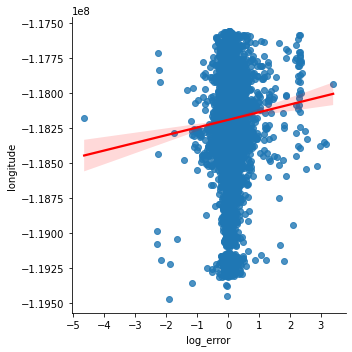

In [9]:
e.Q1_viz_1(train)

#### VIZ Analysis
* Words
* Words

* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.

In [10]:
e.pearson_r(train, 'longitude', 'log_error')

Reject the null hypothesis


(0.026252048697670314, 1.0522927492435017e-05)

<div class="alert alert-info">

# Q-1 Findings

* The p-value/2 is less than the alpha. 
    
## YES
There is a significant ```relationship``` between longitude and log_error  
    
**There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.**  
    
* Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

<div class="alert alert-warning">


## Q-1
## Is there a relationship between latitude and logerror??

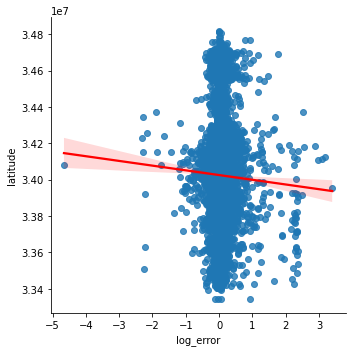

In [11]:
e.Q1_viz_2(train)

#### VIZ Analysis
* Words
* Words

* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.

In [12]:
e.pearson_r(train, 'latitude', 'log_error')

Reject the null hypothesis


(-0.01616779019608714, 0.006661498999092204)

<div class="alert alert-info">

# Q-1 Findings

* The p-value/2 is less than the alpha. 

## YES
There is a significant ```relationship``` between latitude and log_error      
    
**There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.**  
    
* Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

<div class="alert alert-warning">


## Q-2
## Is there a relationship between loc_clusters and logerror?

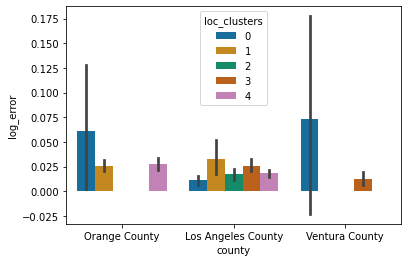

In [13]:
e.Q2_viz_1(train)

#### VIZ Analysis
* Words
* Words

* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.

In [14]:
e.pearson_r(train, 'loc_clusters', 'log_error')

Reject the null hypothesis


(0.015830514745243083, 0.007890975264117776)

<div class="alert alert-info">

# Q-2 Findings

* The p-value/2 is less than the alpha. 
    
## YES
There is a significant ```relationship``` between loc_clusters and log_error  
    
    
**There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.**  
    
* Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

<div class="alert alert-warning">


## Q-2
## Is there a relationship between loc_clusters_0 and logerror?

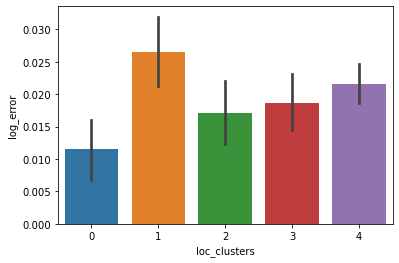

In [15]:
e.Q2_viz_2(train)

#### VIZ Analysis
* Words
* Words

* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.

from scipy import stats

def kruskal_test(df):
    alpha = 0.05

    group_list = [df[df.loc_clusters == x].log_error.to_numpy() for x in range(5)]
    t,p_val = stats.kruskal(group_list[0],group_list[1],group_list[2],group_list[3],group_list[4])
    
    if p_val < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    
    return t,p

In [16]:
e.Q2_test_1(train)

Reject the null hypothesis


(82.46869255198725, 5.221757795863182e-17)

<div class="alert alert-info">

# Q-2 Findings

* The p-value/2 is less than the alpha. 
    
**There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.**  
    
* Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

<div class="alert alert-warning">


## Q-5
## QUESTION?

In [17]:
#Q-5_viz_1()

#### VIZ Analysis
* Words
* Words

* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.


* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


* Two_Tail, Two_Sample
* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.

In [18]:
#Q-5_test_1()

<div class="alert alert-info">

# Q-5 Findings

* The p-value/2 is less than the alpha. 
    
**There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.**  
    
* Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

# Exploration Summary
<div class="alert alert-info">

## Generally speaking the majority of the features in our DataFrame have a linear Relationship with our taeget but the Features with the most significant relationship were:

  1. Property Squarefeet ```('calculatedfinishedsquarefeet')```
  2. Bathrooms ```('bathroomcny')```
  3. Bedrooms ```('bedroomcnt')```     
    
* We found that Property SQFT has the highest correlation with Tax Assessed Property Value at 48%
* The number of Bathrooms comes in at a close second at 44%
* However, the number of Bedrooms (still the third highest correlation) only scores a 24%

## Takeaways:
* Features available are sufficient to conduct predictions
* We could benefit greatly from additional data and Feature Engineering of Location Data
    
## Features that will be selected for Modeling:
* Our target feature is Tax Assessed Property Value ```('taxvaluedollarcnt')```
* Our selected features are:
    1. Property Squarefeet ```('calculatedfinishedsquarefeet')```
    2. Bathrooms ```('bathroomcny')```
    3. Bedrooms ```('bedroomcnt')```

# Features that will be not included in my model

* **y...

# !!! needs to be updated Modeling:

* Since the  Home Value is not normaly distributed I will use **median as a baseline** set at $340,572.

* $R^2$ is the primary metric I will use to evaluate models and secondary will be a favorable $RMSE$. 
* $R^2$ helps understand how well the model fits the data.

* I will evaluate the following top models on train and validate:
        * Polynomial Regression degree 2
        * Polynomial Regression degree 2 with interactions only
        * Polynomial Regression degree 3
        * Polynomial Regression degree 4
* The model that performs the best on validate data will be run with test data.

In [19]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = m.model_data_prep(train, validate, test)

TypeError: model_data_prep() missing 1 required positional argument: 'features_to_model'

In [ ]:
# run predictions on train data for models
train_pred, validate_pred, test_pred = m.predictions(X_train,y_train,X_validate,y_validate,X_test, y_test)



# Comparing Top Models on train and Validate 

### * Baseline Median Home Value                                                            $340,572

In [ ]:
m.metrics(train_pred,y_train, validate_pred, y_validate)


All models outperformed median baseline in terms of RMSE in both train and validate data.

Polynomial Regressor degree 4 did best in train data in both RMSE and $R^2$

The model with the best $R^2$ and RMSE in validate data is Polynomial Regressor degree 3.

**I will select model Polynomial Regressor degree 3 since it has the highest R2 and a least RMSE to other models on validate**

# Model on Test data

In [ ]:
# get metrics on Final Model
m.metric_test(test_pred[['poly_d3','baseline_median']],y_test)

## Modeling Summary

* All models performed better than the baseline
* The Final Model Polynomial Regressor degree 3 had an $R^2$ or .37 on test data and had a better RMSE than baseline by $73,639.

In [ ]:
e.distribution_top_model(y_test, test_pred)   


# Conclusion

## Exploration



* Homes with an optional feature such as deck, pools, garage, fireplace have more value.
* Home with more bedrooms and bathrooms tend to have more value on average.
* County location make a difference in home value.
* Home age has a relationship with home value.

## Modeling

**The final model has an $R^2$ of 0.37 and performed  better than the median baseline by $ 73,639 RMSE** 


## Recommendations

* Standardize methods of data collection to increase data accuracy; this will likely improve models ability to predict future home values.

## Next Steps

* Look into locations of homes with information about neighborhoods and/or longitute and latitute to explore relationships between location and home value.
* Explore if lot size has and influence on home value.
